In [6]:
#stuff from Ted
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, metrics, Model
from tensorflow.keras.callbacks import Callback
#from data import load_image_h5
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt
import h5py
from tensorflow import reshape
import datetime
%load_ext tensorboard
print(tf.__version__)

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
2.4.1


In [7]:
dataset = h5py.File('OPPAC_Data/simu_HDF_thistimeforReal.h5', 'r')
num_diodes = dataset['Num_diodes'][...]
x_pos = (dataset['Xpos'][...])/100
y_pos = (dataset['Ypos'][...])/100
histgrid = dataset['histgrid'][...]
output = np.vstack((x_pos,y_pos)) #define new, single variable for x and y position
output = np.transpose(output) #original definition was sideways, so we transposed it
dataset.close()

In [8]:
print(histgrid.shape)

(1001, 342, 132)


In [9]:
#way to check location of specific output labels
x_locat = np.where(output[:,0] == -40)
y_locat = np.where(output[:,1] == 0)

print(np.intersect1d(x_locat, y_locat))

[127]


3
16


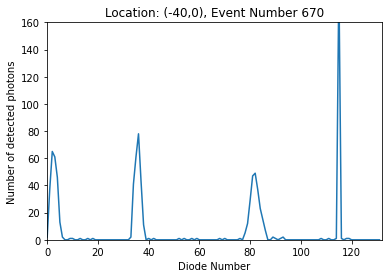

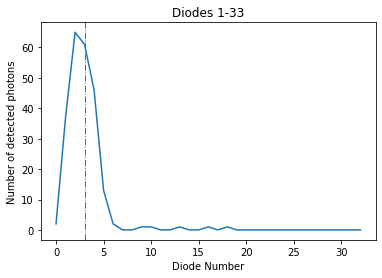

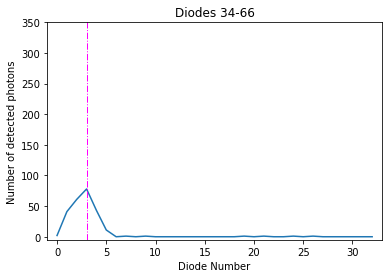

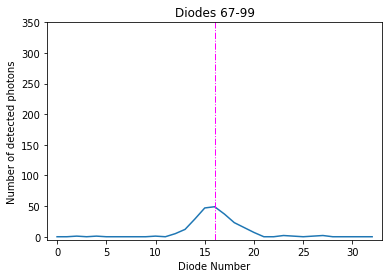

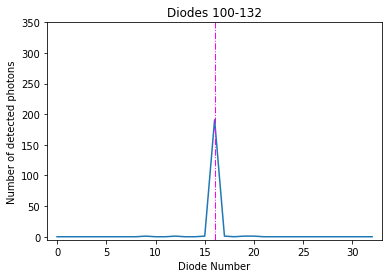

In [11]:
#graphs all 4 sides of a given location and position plus their labels
event_num = 670 #int between 0 and 1000
position = 127 #int between 0 and 341


#x and y at the "position;" the correct peak location
#converted into diode number bc the labels start in mm
x_peak_value = round(((output[position][0]+48)/100)*33)
y_peak_value = round(((output[position][1]+48)/100)*33)

title = (output[position][0],output[position][1], event_num)

print(x_peak_value)
print(y_peak_value)
 
test_histogram = []
for i in range(132):
        test_histogram.append(histgrid[event_num][position][i])    
np.array(test_histogram)

#plt.axis([0, 132, 0, 160])
plt.title('Location: (%.0f,%.0f), Event Number %.0f' %tuple(title))
plt.xlabel('Diode Number')
plt.ylabel('Number of detected photons')
plt.plot(test_histogram)
plt.show()

test_histogram1 = []
for i in range(33):
    test_histogram1.append(histgrid[event_num][position][i])   
np.array(test_histogram1)

plt.title('Diodes 1-33')
plt.xlabel('Diode Number')
plt.ylabel('Number of detected photons')
#plt.axis([-1, 33, -5, 350])
plt.plot(test_histogram1)
plt.axvline(x = x_peak_value, color = "magenta", linewidth=1, linestyle='dashdot')
plt.show()

test_histogram2 = []
for i in range(33,66):
    test_histogram2.append(histgrid[event_num][position][i])     
np.array(test_histogram2)

plt.title('Diodes 34-66')
plt.xlabel('Diode Number')
plt.ylabel('Number of detected photons')
plt.axis([-1, 33, -5, 350])
plt.plot(test_histogram2)
plt.axvline(x = x_peak_value, color = "magenta", linewidth=1, linestyle='dashdot')
plt.show()

test_histogram3 = []
for i in range(66,99):
    test_histogram3.append(histgrid[event_num][position][i])     
np.array(test_histogram3)

plt.title('Diodes 67-99')
plt.xlabel('Diode Number')
plt.ylabel('Number of detected photons')
plt.axis([-1, 33, -5, 350])
plt.plot(test_histogram3)
plt.axvline(x = y_peak_value, color = "magenta", linewidth=1, linestyle='dashdot')
plt.show()

test_histogram4 = []
for i in range(99,132):
    test_histogram4.append(histgrid[event_num][position][i])    
np.array(test_histogram4)

plt.title('Diodes 100-132')
plt.xlabel('Diode Number')
plt.ylabel('Number of detected photons')
plt.axis([-1, 33, -5, 350])
plt.plot(test_histogram4)
plt.axvline(x = y_peak_value, color = "magenta", linewidth=1, linestyle='dashdot') 
plt.show()

In [13]:
#uses alternative dataset (the new verison)
dataset = np.load("/home/roberts/O-PPAC/recomplied_dataset.npy")
all_data = dataset[ : , :132]
all_labels = dataset[: , -2:]

print(all_data.shape)
print(all_labels.shape)

(338922, 132)
(338922, 2)


In [17]:
all_data[32][:]

array([  1.,   1.,   1.,   1.,   0.,   0.,   0.,   2.,   1.,   4.,  34.,
        75.,  85.,  57.,  37.,   5.,   0.,   1.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   1.,   1.,   0.,   0.,   0.,   0.,
         1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   2.,
        91., 130.,  79.,   7.,   1.,   0.,   0.,   0.,   0.,   0.,   2.,
         0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,  12.,  47.,
        63.,  81.,  65.,  44.,   5.,   0.,   1.,   1.,   0.,   1.,   1.,
         0.,   0.,   2.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   1.,   1.,  10.,
        86., 121.,  74.,   6.,   0.,   0.,   1.,   0.,   1.,   1.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   1.])

21.12
7.92


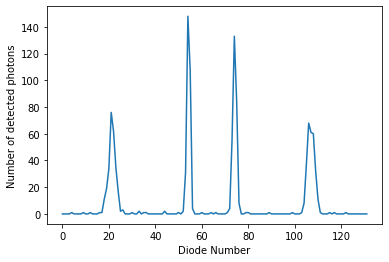

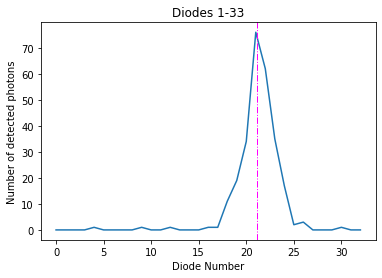

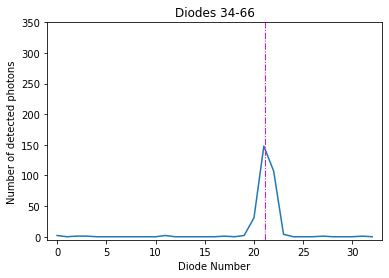

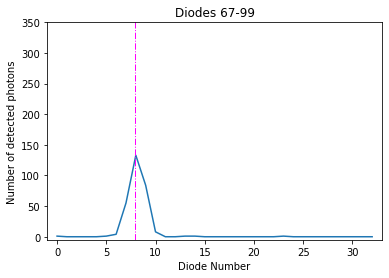

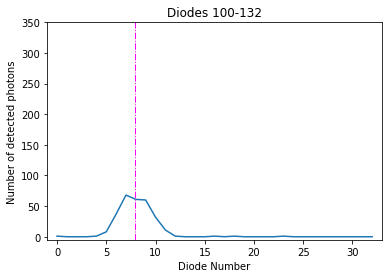

In [19]:
#graphs all 4 sides of the event by total index within the data array
#number between 0 and 338922 (or other depending on the dataset)
index = 199324


#x and y at the "position;" the correct peak location
#converted into diode number bc the labels start in mm
x_peak_value = ((all_labels[index][0]+48)/100)*33
y_peak_value = ((all_labels[index][1]+48)/100)*33

print(x_peak_value)
print(y_peak_value)
 
test_histogram = []
for i in range(132):
        test_histogram.append(all_data[index][i])    
np.array(test_histogram)

#plt.axis([0, 132, 0, 160])
plt.xlabel('Diode Number')
plt.ylabel('Number of detected photons')
plt.plot(test_histogram)
plt.show()

test_histogram1 = []
for i in range(33):
    test_histogram1.append(all_data[index][i])   
np.array(test_histogram1)

plt.title('Diodes 1-33')
plt.xlabel('Diode Number')
plt.ylabel('Number of detected photons')
#plt.axis([-1, 33, -5, 350])
plt.plot(test_histogram1)
plt.axvline(x = x_peak_value, color = "magenta", linewidth=1, linestyle='dashdot')
plt.show()

test_histogram2 = []
for i in range(33,66):
    test_histogram2.append(all_data[index][i])     
np.array(test_histogram2)

plt.title('Diodes 34-66')
plt.xlabel('Diode Number')
plt.ylabel('Number of detected photons')
plt.axis([-1, 33, -5, 350])
plt.plot(test_histogram2)
plt.axvline(x = x_peak_value, color = "magenta", linewidth=1, linestyle='dashdot')
plt.show()

test_histogram3 = []
for i in range(66,99):
    test_histogram3.append(all_data[index][i])     
np.array(test_histogram3)

plt.title('Diodes 67-99')
plt.xlabel('Diode Number')
plt.ylabel('Number of detected photons')
plt.axis([-1, 33, -5, 350])
plt.plot(test_histogram3)
plt.axvline(x = y_peak_value, color = "magenta", linewidth=1, linestyle='dashdot')
plt.show()

test_histogram4 = []
for i in range(99,132):
    test_histogram4.append(all_data[index][i])    
np.array(test_histogram4)

plt.title('Diodes 100-132')
plt.xlabel('Diode Number')
plt.ylabel('Number of detected photons')
plt.axis([-1, 33, -5, 350])
plt.plot(test_histogram4)
plt.axvline(x = y_peak_value, color = "magenta", linewidth=1, linestyle='dashdot') 
plt.show()